<a href="https://colab.research.google.com/github/melypadillareyes15-cell/Assignments/blob/main/Assignments/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 6 - Convolutional Neural Network (CNN)**
---

# **Personal Information**

**Team Members:**
*   Melissa Montserrat Padilla Reyes(2006606)
*   Marcelo Carranco Valladares (2013534)

**Career:** Biomedical Engineering

**Group:** 002

**Class:** Artificial Inteligence

**Professor:** Daniel Isaías López Páez

**Hour:** N2




# **Code**

**Load Libraries**

First we import the needed libraries for the CNN model. We'll use matplotlib, numpy, PIL and tensorflow for keras.

In [ ]:
#Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models
from keras.datasets import mnist
from random import randint

**Load Data**

We load the data. Here, we will use the MNIST dataset.

In [ ]:
#Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Data Preprocessing**

We normalize the pixel values from the imported dataset.

In [ ]:
# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

We can observe that the dataset was imported correctly.

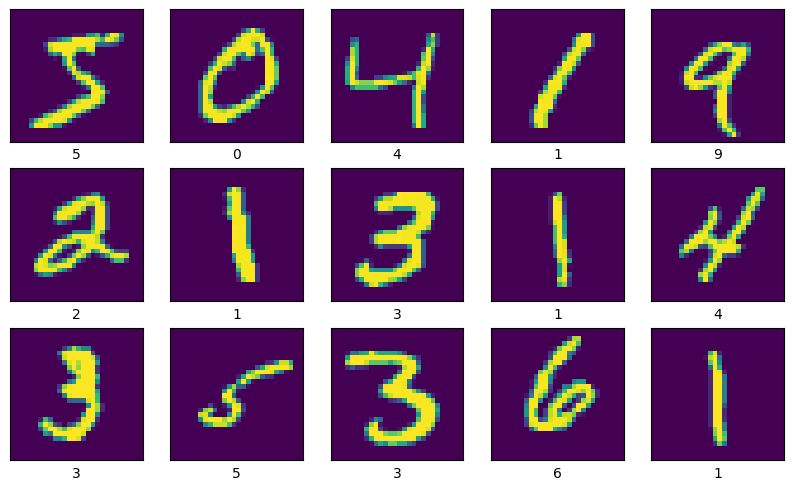

In [ ]:
#Show Dataset

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

**Model Selection and Training**

We create the CNN model.

In [ ]:
#CNN creation

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #Softmax on top layer

A summary of the structure of the CNN model can be observed.

In [ ]:
#Structure of CNN

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

We train the CNN model.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8, batch_size=180,
                    validation_data=(test_images, test_labels))

Epoch 1/8
334/334 [==============================] - 50s 145ms/step - loss: 0.3111 - accuracy: 0.9090 - val_loss: 0.0774 - val_accuracy: 0.9750
Epoch 2/8
334/334 [==============================] - 49s 148ms/step - loss: 0.0713 - accuracy: 0.9777 - val_loss: 0.0437 - val_accuracy: 0.9848
Epoch 3/8
334/334 [==============================] - 51s 152ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0427 - val_accuracy: 0.9860
Epoch 4/8
334/334 [==============================] - 48s 145ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 5/8
334/334 [==============================] - 47s 141ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0339 - val_accuracy: 0.9892
Epoch 6/8
334/334 [==============================] - 48s 142ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0312 - val_accuracy: 0.9894
Epoch 7/8
334/334 [==============================] - 49s 146ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0267 - val_accuracy:

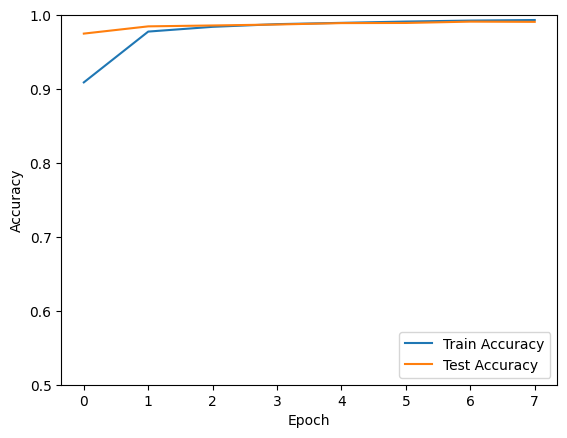

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

**Model Testing**

We test the model with the training done.

1/1 [==============================] - 0s 112ms/step
Predict: 5
Real: 5


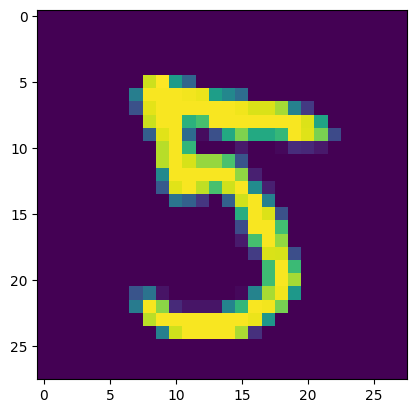

1/1 [==============================] - 0s 20ms/step
Predict: 2
Real: 2


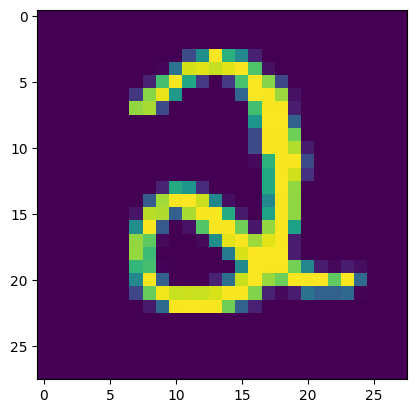

1/1 [==============================] - 0s 20ms/step
Predict: 5
Real: 5


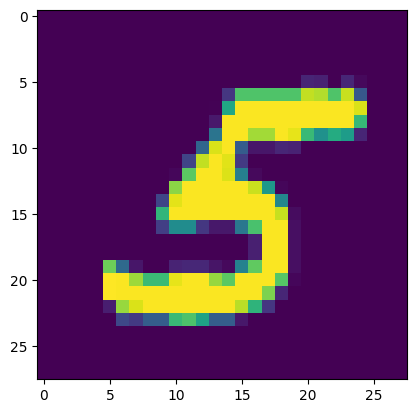

1/1 [==============================] - 0s 55ms/step
Predict: 4
Real: 4


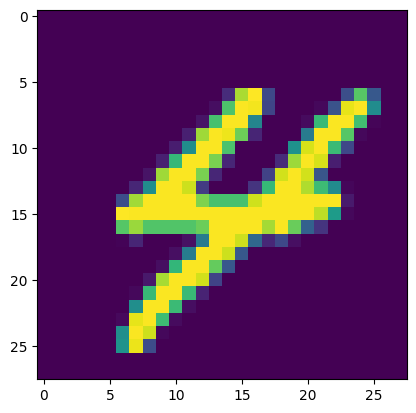

1/1 [==============================] - 0s 20ms/step
Predict: 1
Real: 1


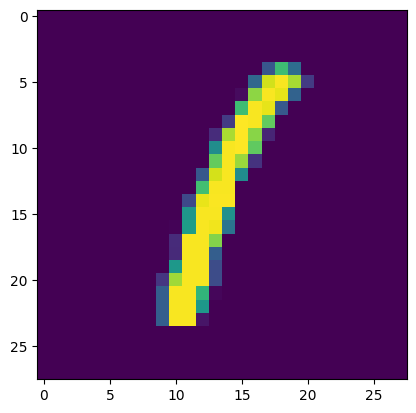

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, steps=5)

# 5 Predictions
for x in range(5):

    # Random index in dataset
    i = randint(0, len(test_images))

    # Prediction
    predict = np.argmax(model.predict(test_images[i:i+1]))

    # Values and images
    print("Predict:", predict)
    print("Real:", test_labels[i])
    plt.imshow(test_images[i])
    plt.show()


**Questions**



*   *How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?*

>  **8, with a batch_size of 180.**

*   *Did you get a better performance on this assignment or on assignment 6? Why?*


> **Yes, the obtained results performed better. The CNN is specifically designed to handle spatially structured data like images efficiently, which often leads to better performance compared to traditional feedforward neural networks. In here, the convolutional layers learn to detect several patters which helps us sort and classify several data.**